### Sentiment Analysis

The procedure of discovering and classifying opinions expressed in a piece of text (like comments/feedback text) is called the sentiment analysis. The intended output of this analysis would be to determine whether the writer’s mind-set towards a topic, product, service etc. is neutral, positive or negative.

In [1]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
import matplotlib.pyplot as plt

C:\Users\Manoh\Anaconda2\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


### Load Data

In [2]:
data = pd.read_csv('Data/customer_review.csv')
data.head(5)

,ID,Review
0,1,Excellent service my claim was dealt with very...
1,2,Very sympathetically dealt within all aspects ...
2,3,Having received yet another ludicrous quote fr...
3,4,Very prompt and fair handling of claim. A mino...
4,5,Very good and excellent value for money simple...


In [9]:
SIA = SentimentIntensityAnalyzer()

data['polarity_score']=data.Review.apply(lambda x:SIA.polarity_scores(x)['compound'])
data['neutral_score']=data.Review.apply(lambda x:SIA.polarity_scores(x)['neu'])
data['negative_score']=data.Review.apply(lambda x:SIA.polarity_scores(x)['neg'])
data['positive_score']=data.Review.apply(lambda x:SIA.polarity_scores(x)['pos'])
data['sentiment']=''
data.loc[data.polarity_score>0,'sentiment']='POSITIVE'
data.loc[data.polarity_score==0,'sentiment']='NEUTRAL'
data.loc[data.polarity_score<0,'sentiment']='NEGATIVE'
print data.head()

   ID                                             Review  polarity_score  \
0   1  Excellent service my claim was dealt with very...          0.7346   
1   2  Very sympathetically dealt within all aspects ...         -0.8155   
2   3  Having received yet another ludicrous quote fr...          0.9785   
3   4  Very prompt and fair handling of claim. A mino...          0.1440   
4   5  Very good and excellent value for money simple...          0.8610   

   neutral_score  negative_score  positive_score sentiment  
0          0.618           0.000           0.382  POSITIVE  
1          0.680           0.320           0.000  NEGATIVE  
2          0.711           0.039           0.251  POSITIVE  
3          0.651           0.135           0.214  POSITIVE  
4          0.485           0.000           0.515  POSITIVE  


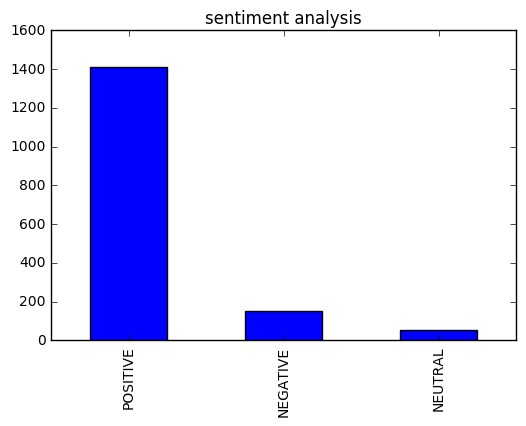

In [8]:
data.sentiment.value_counts().plot(kind='bar',title="sentiment analysis")
plt.show()